In [143]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud




In [144]:
df=pd.read_csv("spam.csv", encoding='latin-1')
df=df[['v1','v2']]

In [145]:
df[['v1','v2']]=df[['v1','v2']].astype(str)

In [146]:
import string



## TASK 1a: Find the 10 most frequent words for each class (remove stopwords first)



In [131]:
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

In [147]:
def clean_and_tokenize(text):
    text = text.lower() 
    text = text.translate(str.maketrans('', '', string.punctuation))  
    words = text.split()  
    words = [word for word in words if word not in stop_words]  
    return words

#Text data from spam and ham
spam_texts = df[df['v1'] == 'spam']['v2']
ham_texts = df[df['v1'] == 'ham']['v2']

# Tokenize and count
spam_words = [word for text in spam_texts for word in clean_and_tokenize(text)]
ham_words = [word for text in ham_texts for word in clean_and_tokenize(text)]

# Count word frequencies
spam_word_freq = Counter(spam_words)
ham_word_freq = Counter(ham_words)

# Get the top 10 most common words
top_10_spam_words = spam_word_freq.most_common(10)
top_10_ham_words = ham_word_freq.most_common(10)

# Extract words from the top 10 tuples
spam_top_words = [word for word, freq in top_10_spam_words]
ham_top_words = [word for word, freq in top_10_ham_words]

# Print the results
print("Top 10 words in spam messages:", spam_top_words)
print("Top 10 words in ham messages:", ham_top_words)

Top 10 words in spam messages: ['call', 'free', '2', 'txt', 'u', 'ur', 'mobile', 'text', '4', 'claim']
Top 10 words in ham messages: ['u', 'im', '2', 'get', 'ltgt', 'ok', 'dont', 'go', 'ur', 'ill']


## TASK 1b: Find the 10 most frequent bi-gams each class  (remove stopwords first)

In [148]:
from nltk import bigrams
def generate_bigrams(text):
    words = clean_and_tokenize(text)
    return list(bigrams(words))  # Generate bigrams

spam_trigrams = [word for text in spam_texts for word in generate_bigrams(text)]
ham_bigrams = [word for text in ham_texts for word in generate_bigrams(text)]

spam_bigram_freq = Counter(spam_trigrams)
ham_bigram_freq = Counter(ham_bigrams)

top_10_spam_bigrams = spam_bigram_freq.most_common(10)
top_10_ham_bigrams = ham_bigram_freq.most_common(10)


print(f'Top 10 spam bigrams:{top_10_spam_bigrams}')
print(f'Top 10 ham bigrams:{top_10_ham_bigrams}')


Top 10 spam bigrams:[(('please', 'call'), 44), (('contact', 'u'), 24), (('po', 'box'), 24), (('å£1000', 'cash'), 23), (('guaranteed', 'call'), 23), (('prize', 'guaranteed'), 22), (('send', 'stop'), 19), (('every', 'week'), 19), (('await', 'collection'), 19), (('urgent', 'mobile'), 18)]
Top 10 ham bigrams:[(('call', 'later'), 50), (('ill', 'call'), 48), (('let', 'know'), 39), (('sorry', 'ill'), 39), (('r', 'u'), 37), (('u', 'r'), 33), (('dont', 'know'), 32), (('wan', '2'), 31), (('good', 'morning'), 30), (('im', 'going'), 24)]


## TASK 1c: Find the 10 most frequent tri-gams each class  (remove stopwords first)

In [134]:
from nltk import trigrams
def generate_trigrams(text):
    words = clean_and_tokenize(text)
    return list(trigrams(words))  # Generate bigrams

spam_trigrams = [word for text in spam_texts for word in generate_trigrams(text)]
ham_trigrams = [word for text in ham_texts for word in generate_trigrams(text)]

spam_trigram_freq = Counter(spam_trigrams)
ham_trigram_freq = Counter(ham_trigrams)

top_10_spam_trigrams = spam_trigram_freq.most_common(10)
top_10_ham_trigrams = ham_trigram_freq.most_common(10)


print(f'Top 10 spam trigrams:{top_10_spam_trigrams}')
print(f'Top 10 ham trigrams:{top_10_ham_trigrams}')


Top 10 spam trigrams:[(('prize', 'guaranteed', 'call'), 21), (('reply', 'call', '08000930705'), 14), (('land', 'line', 'claim'), 14), (('private', '2003', 'account'), 13), (('2003', 'account', 'statement'), 13), (('guaranteed', 'å£1000', 'cash'), 12), (('camcorder', 'reply', 'call'), 12), (('shows', '800', 'unredeemed'), 12), (('free', 'entry', '2'), 11), (('please', 'call', 'customer'), 11)]
Top 10 ham trigrams:[(('ill', 'call', 'later'), 42), (('sorry', 'ill', 'call'), 38), (('u', 'wan', '2'), 21), (('happy', 'new', 'year'), 18), (('pls', 'send', 'message'), 13), (('cant', 'pick', 'phone'), 12), (('pick', 'phone', 'right'), 12), (('phone', 'right', 'pls'), 12), (('right', 'pls', 'send'), 12), (('hi', 'hi', 'hi'), 11)]


## TASK 1c: Create wordcloud each class (remove stopwords first)

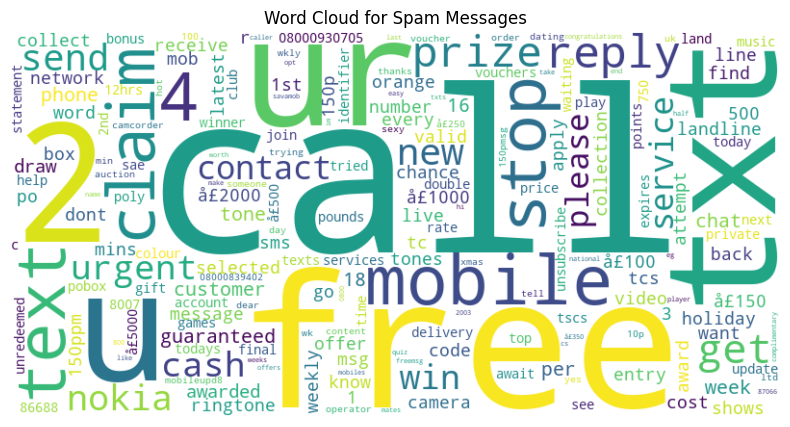

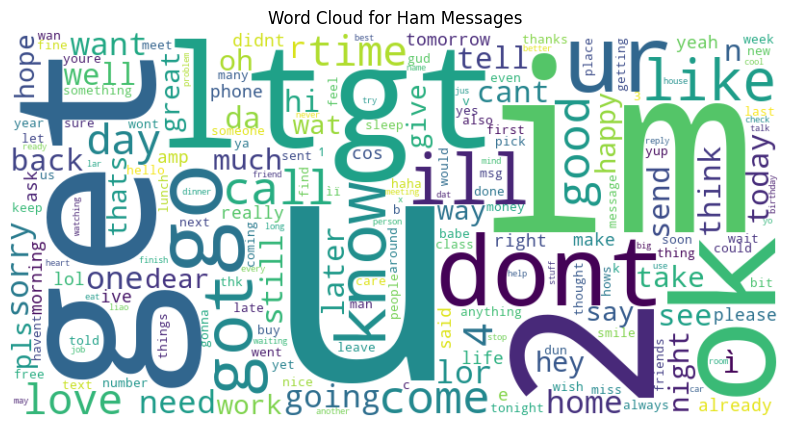

In [156]:
def generate_wordcloud(freq_dict, title):
    wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud1, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and display word clouds
generate_wordcloud(spam_word_freq, 'Word Cloud for Spam Messages')
generate_wordcloud(ham_word_freq, 'Word Cloud for Ham Messages')






## TASK 2: Convert Text to Vectors Using Bag-of-Words Model

In [160]:

vectorizer = CountVectorizer(stop_words=stop_words)
X_bow = vectorizer.fit_transform(df['v2'])
y = df['v1'].map({'ham': 0, 'spam': 1})

## TASK 3:

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Apply Machine Learning Model and Record the F1-Score
model = RandomForestClassifier()
model.fit(X_train_bow, y_train)
y_pred_bow = model.predict(X_test_bow)

f1_bow = f1_score(y_test, y_pred_bow)
print("F1-score with Bag-of-Words:", f1_bow)
print(classification_report(y_test, y_pred_bow))

F1-score with Bag-of-Words: 0.9051094890510949
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [169]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hones\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hones\AppData\Roaming\nltk_data...


True

In [170]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## TASK 4:

In [179]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
X_tfidf = tfidf_vectorizer.fit_transform(df['v2'])

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)
y_pred_tfidf = model.predict(X_test_tfidf)

f1_tfidf = f1_score(y_test, y_pred_tfidf)
print("F1-score with Tf-IDF:", f1_tfidf)
print(classification_report(y_test, y_pred_tfidf))

F1-score with Tf-IDF: 0.8970588235294118
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



## TASK 5:

In [172]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}\b', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

df['text_processed'] = df['v2'].apply(preprocess_text)

In [173]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_preprocessed = tfidf_vectorizer.fit_transform(df['text_processed'])

X_train_tfidf_preprocessed, X_test_tfidf_preprocessed, y_train, y_test = train_test_split(X_tfidf_preprocessed, y, test_size=0.2, random_state=42)

In [175]:
model = RandomForestClassifier()
model.fit(X_train_tfidf_preprocessed, y_train)
y_pred_tfidf_preprocessed = model.predict(X_test_tfidf_preprocessed)

f1_tfidf_preprocessed = f1_score(y_test, y_pred_tfidf_preprocessed)
print("F1-score with Tf-IDF and Preprocessing:", f1_tfidf_preprocessed)
print(classification_report(y_test, y_pred_tfidf_preprocessed))

F1-score with Tf-IDF and Preprocessing: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



## TASK 6:

In [180]:
print("F1-score with Bag-of-Words:", f1_bow)
print("F1-score with Tf-IDF:", f1_tfidf)
print("F1-score with Tf-IDF and Preprocessing:", f1_tfidf_preprocessed)

F1-score with Bag-of-Words: 0.9051094890510949
F1-score with Tf-IDF: 0.8970588235294118
F1-score with Tf-IDF and Preprocessing: 0.8888888888888888
